In [53]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [67]:
# import data
buildings = pd.read_excel('Data/Beithanun.xls', sheet_name='Buildings.dbf')
vv_asc = pd.read_excel('Data/Beithanun.xls', sheet_name='Log_VV_asc')
vv_desc = pd.read_excel('Data/Beithanun.xls', sheet_name='Log_VV_desc')
vh_asc = pd.read_excel('Data/Beithanun.xls', sheet_name='Log_VH_asc')
vh_desc = pd.read_excel('Data/Beithanun.xls', sheet_name='Log_VH_desc')
sentinel_2 = pd.read_csv("Data/Sentinel2.csv")
test_ids = pd.read_csv("Data/nietopvoorspellen.csv")


In [68]:
def merge_data(buildings, vv_asc, vv_desc, vh_asc, vh_desc):
    merged_data = pd.merge(buildings, vv_asc, on='osm_id', how='left')
    merged_data = pd.merge(merged_data, vv_desc, on='osm_id', how='left')
    merged_data = pd.merge(merged_data, vh_asc, on='osm_id', how='left')
    merged_data = pd.merge(merged_data, vh_desc, on='osm_id', how='left')
    merged_data = pd.merge(merged_data, sentinel_2, on='osm_id', how='left')
    return merged_data



merged_data = merge_data(buildings, vv_asc, vv_desc, vh_asc, vh_desc)




C:\Users\dhett\AppData\Local\Temp\ipykernel_32396\1941711858.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'OBJECTID_x', 'ZONE_CODE_x', 'AREA_x', 'COUNT_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = pd.merge(merged_data, vh_desc, on='osm_id', how='left')


In [69]:
merged_data.head(5)

,OID,osm_id,code,fclass,name,type,OBJECTID_x,ZONE_CODE_x,COUNT_x,AREA_x,...,DIFF__POSTmean,DIFF__POSTmedian,DIFF__POSTstdev,DIFF__POSTmin,DIFF__POSTmax,DIFF__POSTrange,DIFF__POSTminority,DIFF__POSTmajority,DIFF__POSTvariety,DIFF__POSTvariance
0,0,41242992,1500,building,,,1.0,1.0,2.0,1.613941e-08,...,-0.500000,-0.500000,0.916667,-1.416666,0.416667,1.833333,-1.416666,-1.416666,0,3.131944
1,1,41243003,1500,building,Agricultural Development Association,greenhouse,2.0,2.0,39.0,3.147184e-07,...,3.364815,1.166668,-2.362874,9.500000,0.416668,-9.083332,9.500000,-0.500000,-1,-21.612811
2,2,41243077,1500,building,El Arabia Company for the Manufacture of Water...,industrial,3.0,3.0,16.0,1.291153e-07,...,-3.583333,-2.250000,0.089061,-4.583334,-4.500000,0.083334,-4.583334,-7.083334,3,1.025466
3,3,41243136,1500,building,Beit Hanoun Municipality,,4.0,4.0,8.0,6.455763e-08,...,-3.750000,-6.499999,-2.818262,1.166667,-5.750001,-6.916668,1.166667,-9.750001,0,-15.853176
4,4,41243268,1500,building,El Balawi Farming,,5.0,5.0,27.0,2.178820e-07,...,-18.688172,-19.000002,-1.094499,-17.916666,-18.833336,-0.916670,-17.916666,-20.083334,0,-11.496125


In [70]:
merged_data.columns

Index(['OID', 'osm_id', 'code', 'fclass', 'name', 'type', 'OBJECTID_x',
       'ZONE_CODE_x', 'COUNT_x', 'AREA_x', 'MIN_VV_asc', 'MAX_VV_asc',
       'MEAN_vv_asc', 'OBJECTID_y', 'ZONE_CODE_y', 'COUNT_y', 'AREA_y',
       'MIN_VV_desc', 'MAX_VV_desc', 'MEAN_VV_desc', 'OBJECTID_x',
       'ZONE_CODE_x', 'COUNT_x', 'AREA_x', 'MIN_VH_asc', 'MAX_VH_asc',
       'MEAN_VH_asc', 'OBJECTID_y', 'ZONE_CODE_y', 'COUNT_y', 'AREA_y',
       'MIN_VH_desc', 'MAX_VH_desc', 'MEAN_VH_desc', 'damaged', '_POSTcount',
       '_POSTsum', '_POSTmean', '_POSTmedian', '_POSTstdev', '_POSTmin',
       '_POSTmax', '_POSTrange', '_POSTminority', '_POSTmajority',
       '_POSTvariety', '_POSTvariance', '_PREcount', '_PREsum', '_PREmean',
       '_PREmedian', '_PREstdev', '_PREmin', '_PREmax', '_PRErange',
       '_PREminority', '_PREmajority', '_PREvariety', '_PREvariance',
       'DIFF__POSTcount', 'DIFF__POSTsum', 'DIFF__POSTmean',
       'DIFF__POSTmedian', 'DIFF__POSTstdev', 'DIFF__POSTmin', 'DIFF__POSTmax',
 

In [58]:
def remove_columns(merged_data):
    merged_data = merged_data[['osm_id', 'name', 'MIN_VH_asc', 'MIN_VH_desc', 'MIN_VV_asc', 'MIN_VV_desc', 'MAX_VH_asc', 'MAX_VH_desc', 'MAX_VV_asc', 'MAX_VV_desc', 'MEAN_VH_asc', 'MEAN_VH_desc', 'MEAN_vv_asc', 'MEAN_VV_desc', 'damaged', 'DIFF__POSTmean', 'DIFF__POSTmin',
                               'DIFF__POSTmax', 'DIFF__POSTstdev', 'DIFF__POSTminority', 'DIFF__POSTmajority', 'DIFF__POSTvariance']]
    return merged_data

merged_data = remove_columns(merged_data)

na_counts = merged_data.isna().sum()
print(na_counts)


osm_id                  0
name                    0
MIN_VH_asc            309
MIN_VH_desc           309
MIN_VV_asc            309
MIN_VV_desc           309
MAX_VH_asc            309
MAX_VH_desc           309
MAX_VV_asc            309
MAX_VV_desc           309
MEAN_VH_asc           309
MEAN_VH_desc          309
MEAN_vv_asc           309
MEAN_VV_desc          309
damaged                 0
DIFF__POSTmean          0
DIFF__POSTmin           0
DIFF__POSTmax           0
DIFF__POSTstdev         0
DIFF__POSTminority      0
DIFF__POSTmajority      0
DIFF__POSTvariance      0
dtype: int64


In [89]:

merged_data = merged_data.dropna()

X = merged_data[['MIN_VH_asc', 'MIN_VH_desc', 'MIN_VV_asc', 'MIN_VV_desc', 'MAX_VH_asc', 'MAX_VH_desc', 'MAX_VV_asc', 'MAX_VV_desc', 'MEAN_VH_asc', 'MEAN_VH_desc', 'MEAN_vv_asc', 'MEAN_VV_desc',
                  'DIFF__POSTmean', 'DIFF__POSTmin', 'DIFF__POSTmax', 'DIFF__POSTstdev', 'DIFF__POSTvariance']]
y = merged_data['damaged']

# Create a boolean mask where each value is True if the ID is in the test set, False otherwise
test_mask = merged_data['osm_id'].isin(test_ids['osm_id'])

# Use the mask to get the test set
X_test = X[test_mask]
y_test = y[test_mask]

# Use the inverse of the mask to get the training set
X_train = X[~test_mask]
y_train = y[~test_mask]

clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61       300
           1       0.57      0.50      0.53       286

    accuracy                           0.58       586
   macro avg       0.58      0.57      0.57       586
weighted avg       0.58      0.58      0.57       586



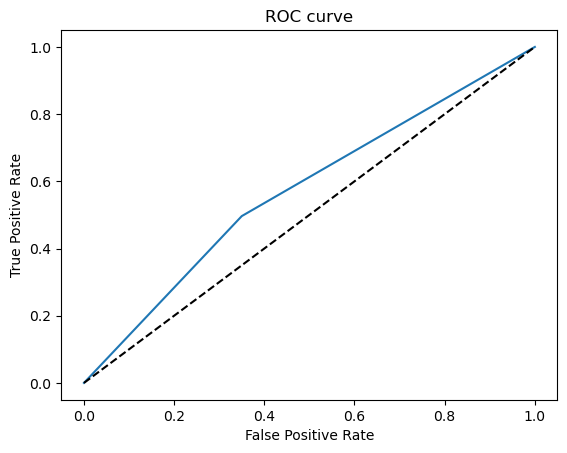

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

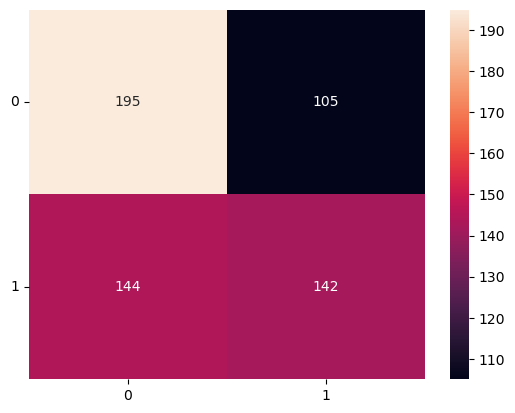

In [91]:
heatmap = sns.heatmap(matrix, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

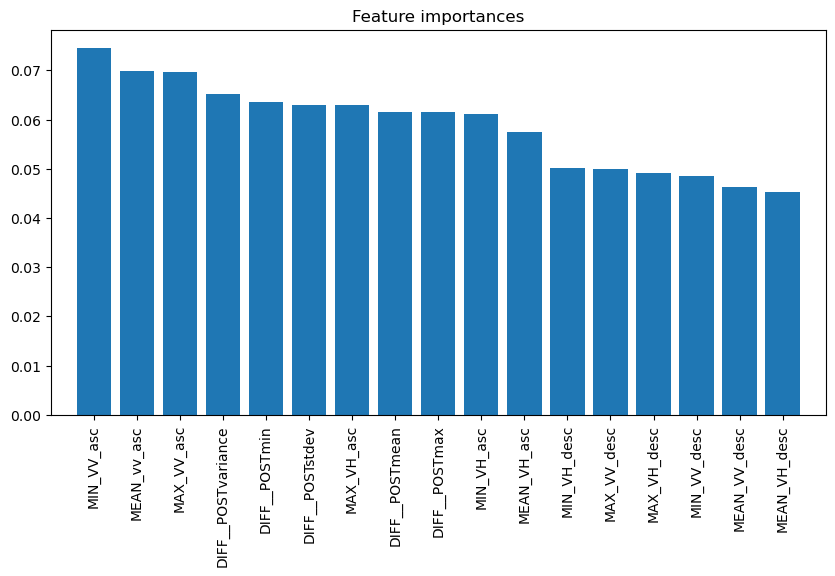

In [74]:
# show importance of features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [109]:
# Create a df with the test results and the osm_id and the real values
results = pd.DataFrame(y_pred, columns=['prediction'])
results['osm_id'] = merged_data['osm_id'][test_mask].values
results['damage'] = y_test.values

# shift the columns so that osm_id is the first column
cols = results.columns.tolist()
cols = cols[-2:] + cols[:-2]
results = results[cols]

# save the results to a csv file
results.to_csv('Scratch/results.csv', index=False)


results.head(5)


,osm_id,damage,prediction
0,41244709,1,0
1,41245117,1,0
2,296470526,0,0
3,300006188,0,0
4,301632602,1,0
